## TWP-ICE Convective organization as a function of Pope et al. (2008) regime

In [1]:
# Load required libraries
from netCDF4 import Dataset
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import datetime
from matplotlib import dates
import math
%matplotlib inline

In [2]:
CY_cdf = Dataset('/home/rjackson/data/num_clusters.cdf', mode='r')

classification = CY_cdf.variables['N'][:]
d1 = CY_cdf.variables['d1'][:]
year_t = CY_cdf.variables['year'][:]
month_t = CY_cdf.variables['month'][:]
day_t = CY_cdf.variables['day'][:]
hour_t = CY_cdf.variables['hour'][:]
minute_t = CY_cdf.variables['minute'][:]

L = 350.0/5
a = 5.0
Nmax = pow((L/a),2)

SCAI = ((classification))/Nmax*d1/(L)*1000

date_array_tobin = []
for i in range(0,len(year_t)):
    dat = datetime.datetime(year_t[i],month_t[i],day_t[i],hour_t[i],minute_t[i],)
    date_array_tobin.append(dat)

CY_cdf = Dataset('/home/rjackson/data/Pope_regime.cdf', mode='r')

groups = CY_cdf.variables['groups'][:]
year = CY_cdf.variables['year'][:]
month = CY_cdf.variables['month'][:]
day = CY_cdf.variables['day'][:]

date_array_pope = []
for i in range(0,len(year)):
    dat = datetime.datetime(int(year[i]),int(month[i]),int(day[i]))
    date_array_pope.append(dat)
    
CY_cdf = Dataset('/home/rjackson/data/Drosdowsky.cdf', mode='r')

groups_d = CY_cdf.variables['groups'][:]
year = CY_cdf.variables['year'][:]
month = CY_cdf.variables['month'][:]
day = CY_cdf.variables['day'][:]
print(year)
date_array_dros = []
for i in range(0,len(year)):
    dat = datetime.datetime(int(year[i]),int(month[i]),int(day[i]))
    date_array_dros.append(dat)


[ 2002.  2002.  2002. ...,  2014.  2014.  2014.]


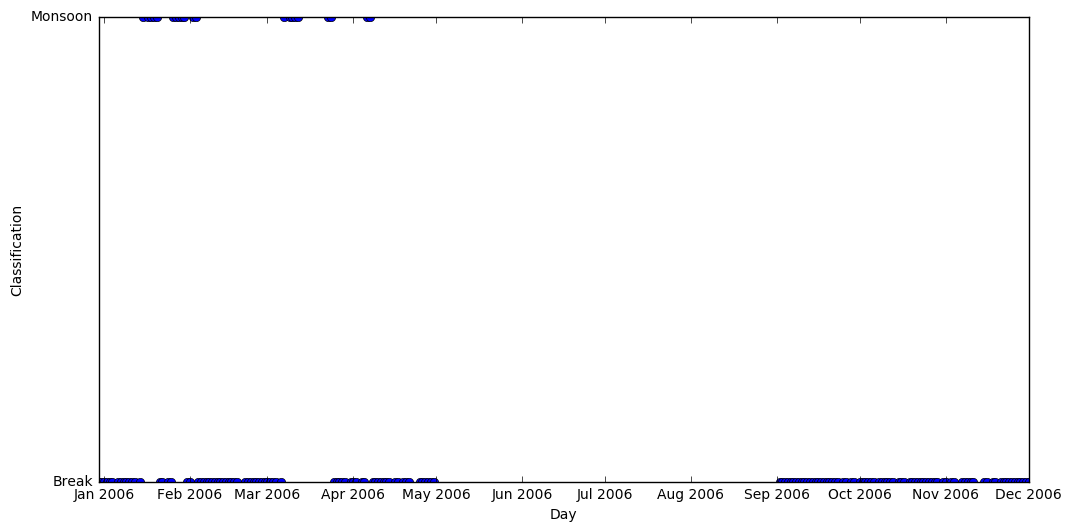

In [3]:
from matplotlib import dates
plt.figure(figsize=(12,6))
ax = plt.plot_date(dates.date2num(date_array_dros[717:890]), groups_d[717:890])
plt.xlabel('Day')
plt.ylabel('Classification')
plt.gca().set_yticks([0,1])
plt.gca().set_yticklabels(['Break', 'Monsoon'])

## Load Simplified Convective Aggregation Index 

SCAI = (number of clusters/maximum number of clusters)*
       (mean distance between clusters/max(x,y) dimension of domain)

/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:648: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins
/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in greater
/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:54: RuntimeWarning: invalid value encountered in greater
/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: invalid value encountered in greater
/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:57: RuntimeWarning: invalid value encountered in greater


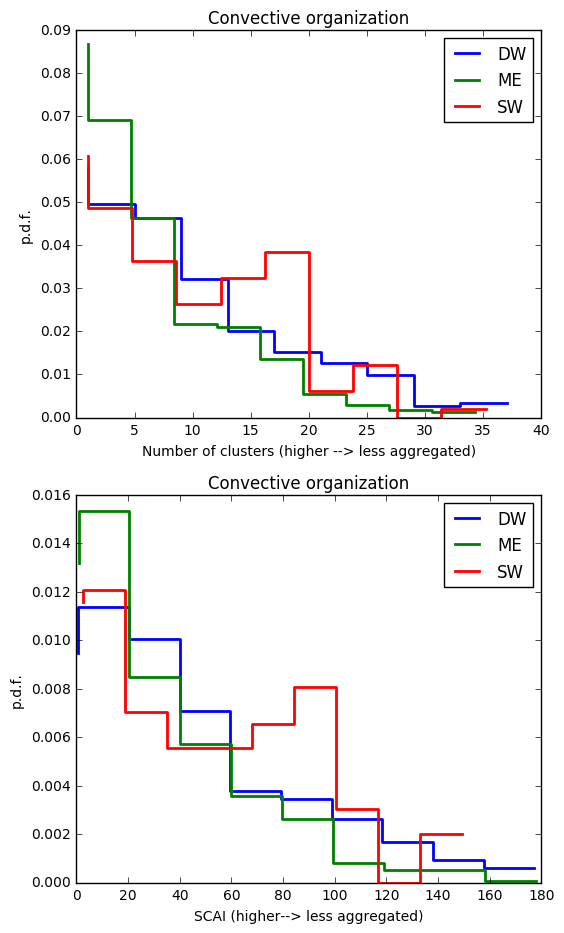

In [4]:
i = 0
N_deep_west = []
N_shallow_west = []
N_east = []
N_dry_east = []
N_moist_east = []

SCAI_deep_west = []
SCAI_shallow_west = []
SCAI_east = []
SCAI_dry_east = []
SCAI_moist_east = []

for dates in date_array_pope:
    i = i + 1
    if(dates.year == 2006):
        date_indicies = np.where(np.logical_and(month_t == dates.month,
                                                day_t == dates.day))
        if(groups[i] == 0):
            N_deep_west.append(classification[date_indicies])
            SCAI_deep_west.append(SCAI[date_indicies])
        elif(groups[i] == 1):
            N_moist_east.append(classification[date_indicies])
            SCAI_moist_east.append(SCAI[date_indicies])
        elif(groups[i] == 2):
            N_east.append(classification[date_indicies])
            SCAI_east.append(SCAI[date_indicies])
        elif(groups[i] == 3):
            N_dry_east.append(classification[date_indicies])
            SCAI_dry_east.append(SCAI[date_indicies])
        else:
            N_shallow_west.append(classification[date_indicies])
            SCAI_shallow_west.append(SCAI[date_indicies])
            
N_dw = np.array([item for sublist in N_deep_west for item in sublist])
N_me = np.array([item for sublist in N_moist_east for item in sublist])
N_e = np.array([item for sublist in N_east for item in sublist])
N_de = np.array([item for sublist in N_dry_east for item in sublist])
N_sw = np.array([item for sublist in N_shallow_west for item in sublist])

S_dw = np.array([item for sublist in SCAI_deep_west for item in sublist])
S_me = np.array([item for sublist in SCAI_moist_east for item in sublist])
S_e = np.array([item for sublist in SCAI_east for item in sublist])
S_de = np.array([item for sublist in SCAI_dry_east for item in sublist])
S_sw = np.array([item for sublist in SCAI_shallow_west for item in sublist])

dw, bins_dw = np.histogram(N_dw[N_dw > 0], 10, density=True)
me, bins_me = np.histogram(N_me[N_me > 0], 10, density=True)
e, bins_e = np.histogram(N_e[N_e > 0], 10, density=True)
de, bins_de = np.histogram(N_de[N_de > 0], 10, density=True)
sw, bins_sw = np.histogram(N_sw[N_sw > 0], 10, density=True)

dws, bins_dws = np.histogram(S_dw[S_dw > 0], 10, density=True)
mes, bins_mes = np.histogram(S_me[S_me > 0], 10, density=True)
es, bins_es = np.histogram(S_e[S_e > 0], 10, density=True)
des, bins_des = np.histogram(S_de[S_de > 0], 10, density=True)
sws, bins_sws = np.histogram(S_sw[S_sw > 0], 10, density=True)

plt.figure(figsize=(6,11))
plt.subplot(211)
a = plt.step(bins_dw[0:-1], dw, label="DW", linewidth=2)
b = plt.step(bins_me[0:-1], me, label="ME", linewidth=2)
#c = plt.step(bins_e[0:-1], e, label="E", linewidth=2)
#d = plt.step(bins_de[0:-1], de, label="DE", linewidth=2)
e = plt.step(bins_sw[0:-1], sw, label="SW", linewidth=2)
plt.legend(['DW','ME','SW'])
plt.title('Convective organization')
plt.xlabel('Number of clusters (higher --> less aggregated)')
plt.ylabel('p.d.f.')

plt.subplot(212)
a = plt.step(bins_dws[0:-1], dws, label="DW", linewidth=2)
b = plt.step(bins_mes[0:-1], mes, label="ME", linewidth=2)
#c = plt.step(bins_e[0:-1], e, label="E", linewidth=2)
#d = plt.step(bins_de[0:-1], de, label="DE", linewidth=2)
e = plt.step(bins_sws[0:-1], sws, label="SW", linewidth=2)
plt.legend(['DW','ME','SW'])
plt.title('Convective organization')
plt.xlabel('SCAI (higher--> less aggregated)')
plt.ylabel('p.d.f.')

/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in greater
/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in greater


51.4974733877


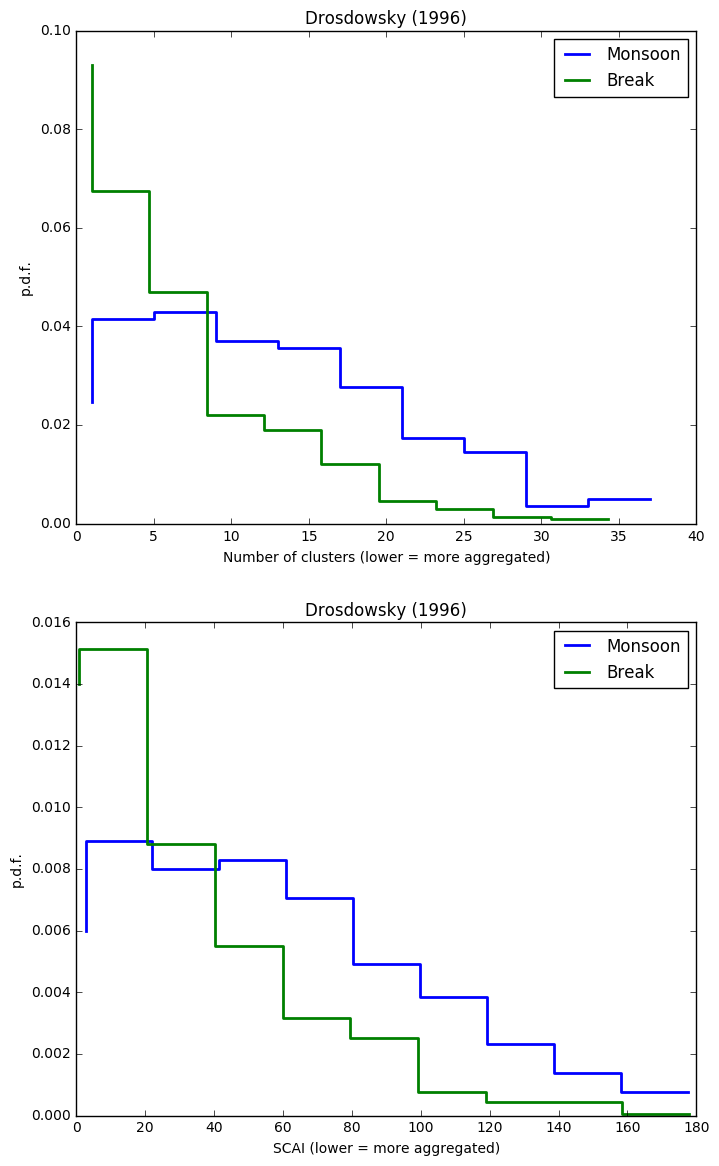

In [8]:
i = 0
N_monsoon = []
N_break = []
SCAI_monsoon = []
SCAI_break = []

for dates in date_array_dros:
    i = i + 1
    if(dates.year == 2006):
        date_indicies = np.where(np.logical_and(month_t == dates.month,
                                                day_t == dates.day))
        if(groups_d[i] == 1):
            N_monsoon.append(classification[date_indicies])
            SCAI_monsoon.append(SCAI[date_indicies])
        else:
            N_break.append(classification[date_indicies])
            SCAI_break.append(SCAI[date_indicies])
            
N_dw = np.array([item for sublist in N_monsoon for item in sublist])
N_me = np.array([item for sublist in N_break for item in sublist])

S_dw = np.array([item for sublist in SCAI_monsoon for item in sublist])
S_me = np.array([item for sublist in SCAI_break for item in sublist])

dw, bins_dw = np.histogram(N_dw[N_dw > 0], 10, density=True)
me, bins_me = np.histogram(N_me[N_me > 0], 10, density=True)

dws, bins_dws = np.histogram(S_dw[S_dw > 0], 10, density=True)
mes, bins_mes = np.histogram(S_me[S_me > 0], 10, density=True)

plt.figure(figsize=(8,14))
plt.subplot(211)
a = plt.step(bins_dw[0:-1], dw, label="Monsoon", linewidth=2)
b = plt.step(bins_me[0:-1], me, label="Break", linewidth=2)
plt.legend(['Monsoon', 'Break'])
plt.xlabel('Number of clusters (lower = more aggregated)')
plt.ylabel('p.d.f.')
plt.title('Drosdowsky (1996)')

plt.subplot(212)
a = plt.step(bins_dws[0:-1], dws, label="Monsoon", linewidth=2)
b = plt.step(bins_mes[0:-1], mes, label="Break", linewidth=2)
plt.legend(['Monsoon', 'Break'])
plt.xlabel('SCAI (lower = more aggregated)')
plt.ylabel('p.d.f.')
plt.title('Drosdowsky (1996)')
print(np.nanmean(SCAI))